In [73]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [75]:
# ĐỌC DỮ LIỆU
app_train = pd.read_csv(r'H:\nam4ki1\PhantichvaTrucquanhoa\home-credit-default-risk\application_train.csv')
print("Shape of application_train:", app_train.shape)

Shape of application_train: (307511, 122)


THÔNG TIN CỞ BẢN VỀ DỮ LIỆU


In [76]:
print(app_train.info())
print(app_train.head(5))
print(app_train.describe(include='all'))
# TÓM TẮT KIỂU DỮ LIỆU
print("\n📝 Tóm tắt kiểu dữ liệu:")
dtype_counts = app_train.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   - {dtype}: {count} cột")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.

Bạn muốn tôi giải thích hàm app_train.describe(include='all') đúng không? Chắc chắn rồi! Hàm này là một công cụ rất hữu ích trong pandas để tóm tắt các thống kê mô tả của DataFrame.

Khi bạn gọi app_train.describe(include='all'), nó sẽ cung cấp một cái nhìn tổng quan nhanh chóng về phân phối dữ liệu của bạn, bao gồm cả các cột số (numerical) và các cột phân loại (categorical).

Đối với các cột số (numerical columns), ví dụ như SK_ID_CURR, TARGET, AMT_INCOME_TOTAL, bạn sẽ thấy các thông số sau:

count: Số lượng giá trị không thiếu (non-null) trong cột.
mean: Giá trị trung bình của cột.
std: Độ lệch chuẩn, đo lường sự phân tán của dữ liệu quanh giá trị trung bình.
min: Giá trị nhỏ nhất trong cột.
25% (Q1): Phân vị thứ 25, tức là 25% dữ liệu có giá trị nhỏ hơn hoặc bằng giá trị này.
50% (Median/Q2): Phân vị thứ 50 (trung vị), tức là một nửa dữ liệu có giá trị nhỏ hơn và một nửa có giá trị lớn hơn giá trị này.
75% (Q3): Phân vị thứ 75, tức là 75% dữ liệu có giá trị nhỏ hơn hoặc bằng giá trị này.
max: Giá trị lớn nhất trong cột.
Đối với các cột phân loại (object/categorical columns), ví dụ như NAME_CONTRACT_TYPE, CODE_GENDER, bạn sẽ thấy các thông số sau:

count: Số lượng giá trị không thiếu trong cột.
unique: Số lượng giá trị duy nhất (distinct values) trong cột.
top: Giá trị xuất hiện nhiều nhất (mode) trong cột.
freq: Tần suất (số lần xuất hiện) của giá trị top.
include='all' là một đối số quan trọng. Mặc định, describe() chỉ hiển thị thống kê cho các cột số. Khi bạn thêm include='all', nó sẽ bao gồm cả các cột có kiểu dữ liệu object (thường là các cột phân loại/chuỗi) và cũng sẽ điền NaN vào các ô không áp dụng (ví dụ: mean cho cột phân loại).

Nhìn vào kết quả của describe() giúp bạn nhanh chóng hiểu được:

Số lượng dữ liệu thiếu: Nếu count nhỏ hơn tổng số dòng của DataFrame, có nghĩa là có dữ liệu thiếu trong cột đó.
Phân phối dữ liệu: Các giá trị mean, std, min, max, và các phân vị giúp bạn đánh giá xem dữ liệu có đối xứng hay bị lệch, có ngoại lệ hay không.
Giá trị phổ biến: top và freq giúp bạn nhận diện các danh mục chính và mức độ phổ biến của chúng.
Đây là một bước đầu tiên và rất quan trọng trong quá trình khám phá dữ liệu (EDA) để hiểu cấu trúc và chất lượng của tập dữ liệu của bạn!

PHÂN TÍCH GIÁ TRỊ BỊ THIẾU (MISSING VALUES)


In [77]:
missing = app_train.isnull().sum().sort_values(ascending=False)
missing_ratio = (missing / len(app_train)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Ratio (%)': missing_ratio
})

print(f"\n📊 Tổng quan:")
print(f"   - Tổng số cột: {app_train.shape[1]}")
print(f"   - Cột có missing: {(missing > 0).sum()}")
print(f"   - Cột có >70% missing: {(missing_ratio > 70).sum()}")
print(f"   - Cột có >50% missing: {(missing_ratio > 50).sum()}")
print(f"   - Cột có >30% missing: {(missing_ratio > 30).sum()}")

print("\n📋 Top 20 cột có missing cao nhất:")
print(missing_df[missing_df['Missing_Count'] > 0].head(20).to_string())

print("\n💡 Khuyến nghị:")
print("   - Cột có >70% missing: NÊN XÓA")
print("   - Cột có 40-70% missing: CÂN NHẮC XÓA hoặc impute cẩn thận")
print("   - Cột có <40% missing: IMPUTE với median/mode")


📊 Tổng quan:
   - Tổng số cột: 122
   - Cột có missing: 67
   - Cột có >70% missing: 0
   - Cột có >50% missing: 41
   - Cột có >30% missing: 50

📋 Top 20 cột có missing cao nhất:
                          Missing_Count  Missing_Ratio (%)
COMMONAREA_AVG                   214865          69.872297
COMMONAREA_MODE                  214865          69.872297
COMMONAREA_MEDI                  214865          69.872297
NONLIVINGAPARTMENTS_MEDI         213514          69.432963
NONLIVINGAPARTMENTS_MODE         213514          69.432963
NONLIVINGAPARTMENTS_AVG          213514          69.432963
FONDKAPREMONT_MODE               210295          68.386172
LIVINGAPARTMENTS_AVG             210199          68.354953
LIVINGAPARTMENTS_MEDI            210199          68.354953
LIVINGAPARTMENTS_MODE            210199          68.354953
FLOORSMIN_MODE                   208642          67.848630
FLOORSMIN_AVG                    208642          67.848630
FLOORSMIN_MEDI                   208642          67.

KIỂM TRA CHẤT LƯỢNG DỮ LIỆU


In [78]:
# 3.1 Giá trị trùng lặp (duplicates)
print("\n Kiểm tra dữ liệu trùng lặp:")
duplicates = app_train.duplicated(subset='SK_ID_CURR').sum()
print(f"   - Số dòng trùng lặp (SK_ID_CURR): {duplicates}")
if duplicates > 0:
    print(f"   ⚠️ CẦN XÓA {duplicates} dòng trùng lặp khi xử lý")
else:
    print("   ✓ Không có dòng trùng lặp")


 Kiểm tra dữ liệu trùng lặp:
   - Số dòng trùng lặp (SK_ID_CURR): 0
   ✓ Không có dòng trùng lặp



 Phân bố TARGET (Label):
   - TARGET = 0 (Không vỡ nợ): 282,686 (91.93%)
   - TARGET = 1 (Vỡ nợ): 24,825 (8.07%)
   - Tỷ lệ imbalance: 1:11.4
   ⚠️ Dữ liệu MẤT CÂN BẰNG NGHIÊM TRỌNG - cần xử lý bằng SMOTE hoặc class_weight


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25740\1680594610.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_dist.index, y=target_dist.values, palette='Set2')


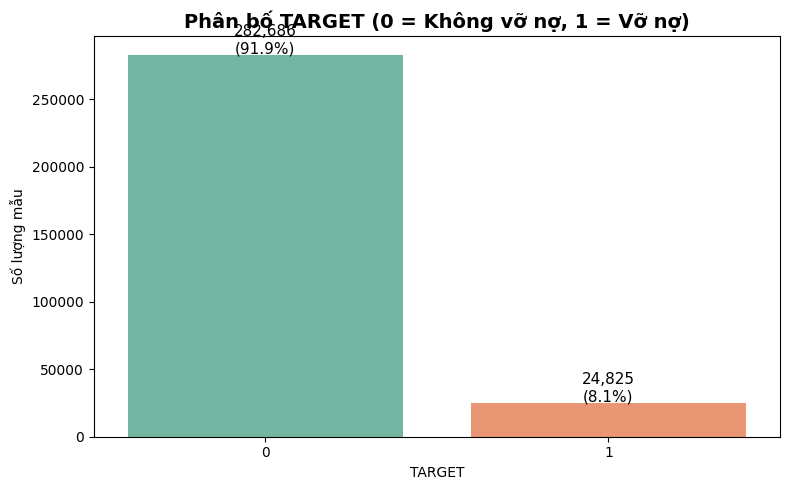

In [79]:
# 3.2: Phân bố TARGET
print("\n Phân bố TARGET (Label):")
target_dist = app_train['TARGET'].value_counts()
target_pct = app_train['TARGET'].value_counts(normalize=True) * 100
print(f"   - TARGET = 0 (Không vỡ nợ): {target_dist[0]:,} ({target_pct[0]:.2f}%)")
print(f"   - TARGET = 1 (Vỡ nợ): {target_dist[1]:,} ({target_pct[1]:.2f}%)")
print(f"   - Tỷ lệ imbalance: 1:{target_dist[0]/target_dist[1]:.1f}")
print(f"   ⚠️ Dữ liệu MẤT CÂN BẰNG NGHIÊM TRỌNG - cần xử lý bằng SMOTE hoặc class_weight")

# Visualization: TARGET distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=target_dist.index, y=target_dist.values, palette='Set2')
plt.title("Phân bố TARGET (0 = Không vỡ nợ, 1 = Vỡ nợ)", fontsize=14, fontweight='bold')
plt.xlabel("TARGET")
plt.ylabel("Số lượng mẫu")
for i, val in enumerate(target_dist.values):
    plt.text(i, val + 1000, f"{val:,}\n({target_pct[i]:.1f}%)", ha='center', fontsize=11)
plt.tight_layout()
plt.show()

In [80]:
# 3.3: Kiểm tra logic errors (chỉ đếm, không sửa)
print("\n Kiểm tra lỗi logic:")
logic_errors = {}

if 'NAME_INCOME_TYPE' in app_train.columns and 'DAYS_EMPLOYED' in app_train.columns:
    unemployed_error = ((app_train['NAME_INCOME_TYPE'] == 'Unemployed') & 
                       (app_train['DAYS_EMPLOYED'] != 365243) & 
                       (app_train['DAYS_EMPLOYED'].notna())).sum()
    if unemployed_error > 0:
        logic_errors['Unemployed nhưng có DAYS_EMPLOYED'] = unemployed_error

if 'CNT_CHILDREN' in app_train.columns:
    negative_children = (app_train['CNT_CHILDREN'] < 0).sum()
    if negative_children > 0:
        logic_errors['CNT_CHILDREN âm'] = negative_children

if 'AMT_INCOME_TOTAL' in app_train.columns:
    invalid_income = (app_train['AMT_INCOME_TOTAL'] <= 0).sum()
    if invalid_income > 0:
        logic_errors['AMT_INCOME_TOTAL <= 0'] = invalid_income

if 'CNT_FAM_MEMBERS' in app_train.columns:
    invalid_family = (app_train['CNT_FAM_MEMBERS'] <= 0).sum()
    if invalid_family > 0:
        logic_errors['CNT_FAM_MEMBERS <= 0'] = invalid_family

if logic_errors:
    print("   ⚠️ Phát hiện các lỗi logic:")
    for error, count in logic_errors.items():
        print(f"      - {error}: {count} dòng ({count/len(app_train)*100:.2f}%)")
else:
    print("   ✓ Không phát hiện lỗi logic")


 Kiểm tra lỗi logic:
   ✓ Không phát hiện lỗi logic


 PHÂN TÍCH PHÂN BỐ VÀ OUTLIERS

In [81]:
# 4.1: Thống kê mô tả mở rộng
print("\n Thống kê mô tả mở rộng (số):")
num_cols = app_train.select_dtypes(include=['int64', 'float64']).columns

desc_extended = app_train[num_cols].describe().T
desc_extended['missing_%'] = app_train[num_cols].isnull().mean() * 100
desc_extended['skew'] = app_train[num_cols].apply(lambda x: skew(x.dropna()))
desc_extended['kurtosis'] = app_train[num_cols].apply(lambda x: kurtosis(x.dropna()))
desc_extended = desc_extended[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing_%', 'skew', 'kurtosis']]

print("\nTop 15 cột (xem đầy đủ):")
print(desc_extended.round(2).head(15).to_string())


 Thống kê mô tả mở rộng (số):

Top 15 cột (xem đầy đủ):
                               count       mean        std       min        25%        50%        75%           max  missing_%    skew   kurtosis
SK_ID_CURR                  307511.0  278180.52  102790.18  100002.0  189145.50  278202.00  367142.50  4.562550e+05       0.00   -0.00      -1.20
TARGET                      307511.0       0.08       0.27       0.0       0.00       0.00       0.00  1.000000e+00       0.00    3.08       7.47
CNT_CHILDREN                307511.0       0.42       0.72       0.0       0.00       0.00       1.00  1.900000e+01       0.00    1.97       7.90
AMT_INCOME_TOTAL            307511.0  168797.92  237123.15   25650.0  112500.00  147150.00  202500.00  1.170000e+08       0.00  391.56  191783.44
AMT_CREDIT                  307511.0  599026.00  402490.78   45000.0  270000.00  513531.00  808650.00  4.050000e+06       0.00    1.23       1.93
AMT_ANNUITY                 307499.0   27108.57   14493.74    1615.

In [82]:
# 4.2: Phân tích độ lệch (Skewness)
print("\n📐 Phân tích độ lệch (Skewness):")
skew_values = app_train[num_cols].apply(lambda x: skew(x.dropna()))
high_skew = skew_values[abs(skew_values) > 1].sort_values(ascending=False, key=abs)

print(f"   - Số cột có |skew| > 1: {len(high_skew)} (cần log-transform)")
print(f"   - Số cột có |skew| > 2: {(abs(skew_values) > 2).sum()} (rất lệch)")
print(f"   - Số cột có |skew| > 3: {(abs(skew_values) > 3).sum()} (cực lệch)")

print("\n   Top 10 cột lệch nhất:")
for col, skew_val in high_skew.head(10).items():
    print(f"      - {col}: {skew_val:.3f}")

print("\n💡 Khuyến nghị:")
print("   - Các cột có |skew| > 1: Áp dụng LOG TRANSFORM (np.log1p)")
print("   - KHÔNG nên xóa outliers trong credit scoring!")


📐 Phân tích độ lệch (Skewness):
   - Số cột có |skew| > 1: 87 (cần log-transform)
   - Số cột có |skew| > 2: 72 (rất lệch)
   - Số cột có |skew| > 3: 55 (cực lệch)

   Top 10 cột lệch nhất:
      - FLAG_MOBIL: -554.534
      - FLAG_DOCUMENT_12: 392.113
      - AMT_INCOME_TOTAL: 391.558
      - FLAG_DOCUMENT_10: 209.588
      - FLAG_DOCUMENT_2: 153.791
      - AMT_REQ_CREDIT_BUREAU_QRT: 134.365
      - FLAG_DOCUMENT_4: 110.894
      - FLAG_DOCUMENT_7: 72.174
      - FLAG_DOCUMENT_17: 61.214
      - FLAG_DOCUMENT_21: 54.613

💡 Khuyến nghị:
   - Các cột có |skew| > 1: Áp dụng LOG TRANSFORM (np.log1p)
   - KHÔNG nên xóa outliers trong credit scoring!



📊 Vẽ biểu đồ phân bố...


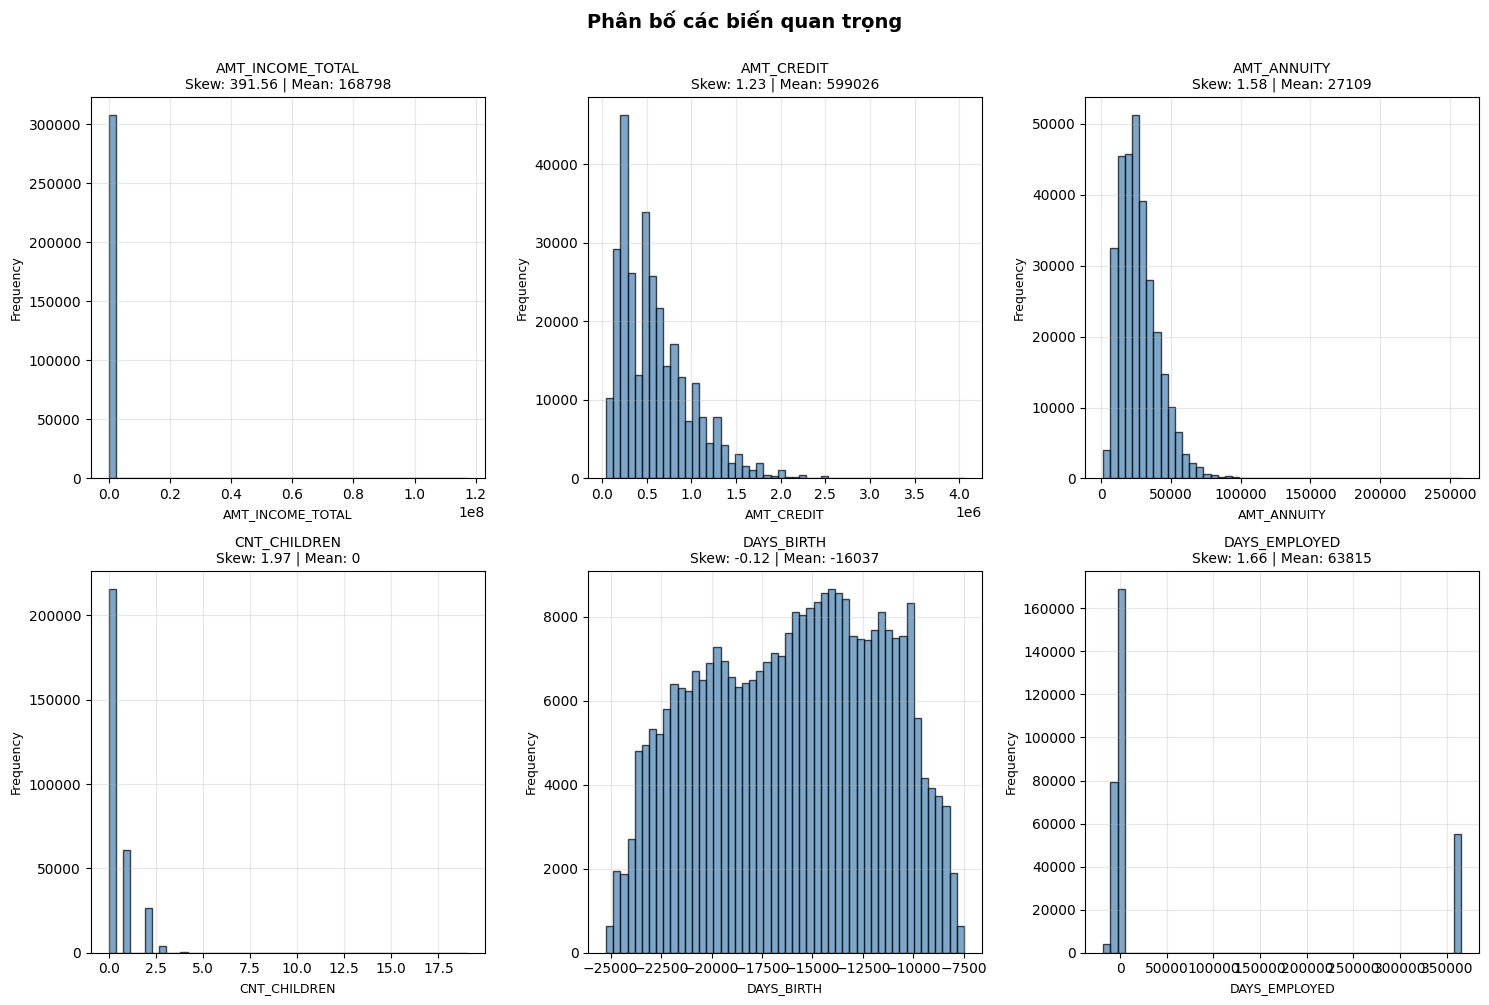

In [83]:
# 4.3: Visualization - Phân bố các biến quan trọng
print("\n📊 Vẽ biểu đồ phân bố...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
cols_to_plot = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

for idx, col in enumerate(cols_to_plot):
    ax = axes[idx // 3, idx % 3]
    if col in app_train.columns:
        data = app_train[col].dropna()
        ax.hist(data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        ax.set_title(f'{col}\nSkew: {data.skew():.2f} | Mean: {data.mean():.0f}', fontsize=10)
        ax.set_xlabel(col, fontsize=9)
        ax.set_ylabel('Frequency', fontsize=9)
        ax.grid(True, alpha=0.3)

plt.suptitle('Phân bố các biến quan trọng', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


📦 Phân tích outliers (IQR method):


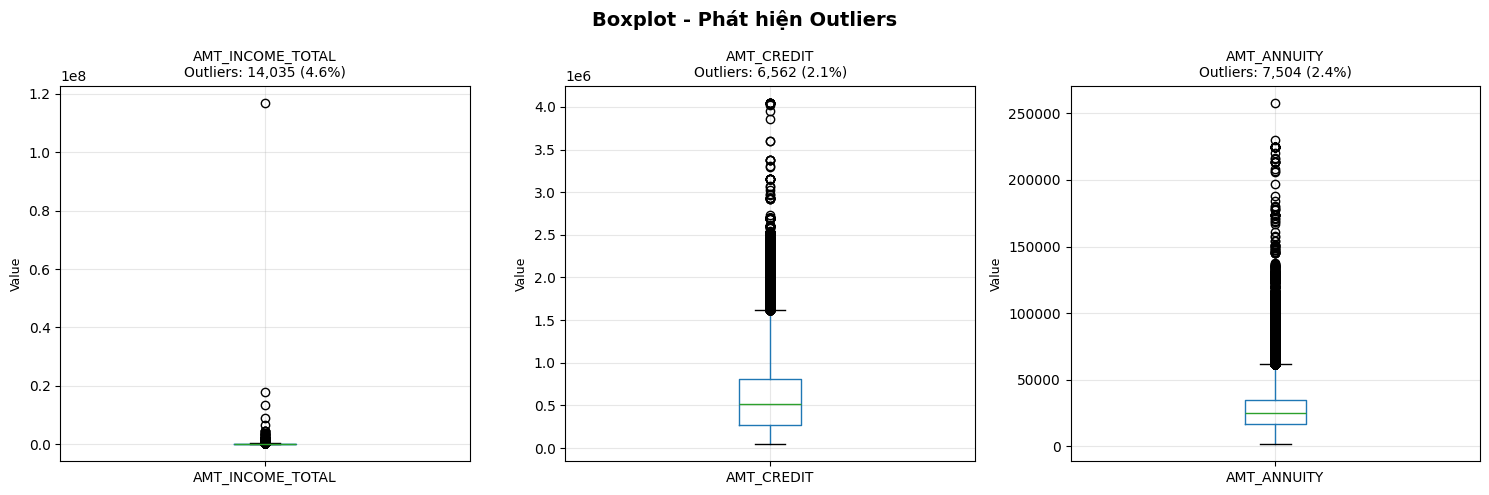


   Bảng tổng hợp outliers:
          Column  Outliers_Count  Outliers_%  Lower_Bound  Upper_Bound
AMT_INCOME_TOTAL           14035        4.56     -22500.0     337500.0
      AMT_CREDIT            6562        2.13    -537975.0    1616625.0
     AMT_ANNUITY            7504        2.44     -10584.0      61704.0

⚠️ LƯU Ý QUAN TRỌNG:
   - KHÔNG xóa outliers trong credit scoring!
   - Outliers có thể là khách hàng cao cấp hoặc high-risk
   - Giải pháp: Dùng log-transform thay vì xóa


In [84]:
# 4.4: Boxplot - Phát hiện outliers
print("\n📦 Phân tích outliers (IQR method):")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
financial_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

outlier_summary = []
for idx, col in enumerate(financial_cols):
    if col in app_train.columns:
        ax = axes[idx]
        data = app_train[col].dropna()
        
        # Tính IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((data < lower_bound) | (data > upper_bound)).sum()
        
        # Vẽ boxplot
        app_train.boxplot(column=col, ax=ax)
        ax.set_title(f'{col}\nOutliers: {outliers:,} ({outliers/len(data)*100:.1f}%)', fontsize=10)
        ax.set_ylabel('Value', fontsize=9)
        ax.grid(True, alpha=0.3)
        
        outlier_summary.append({
            'Column': col,
            'Outliers_Count': outliers,
            'Outliers_%': round(outliers/len(data)*100, 2),
            'Lower_Bound': round(lower_bound, 2),
            'Upper_Bound': round(upper_bound, 2)
        })

plt.suptitle('Boxplot - Phát hiện Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n   Bảng tổng hợp outliers:")
print(pd.DataFrame(outlier_summary).to_string(index=False))

print("\n⚠️ LƯU Ý QUAN TRỌNG:")
print("   - KHÔNG xóa outliers trong credit scoring!")
print("   - Outliers có thể là khách hàng cao cấp hoặc high-risk")
print("   - Giải pháp: Dùng log-transform thay vì xóa")

PHÂN TÍCH TƯƠNG QUAN


 Ma trận tương quan các biến tài chính:


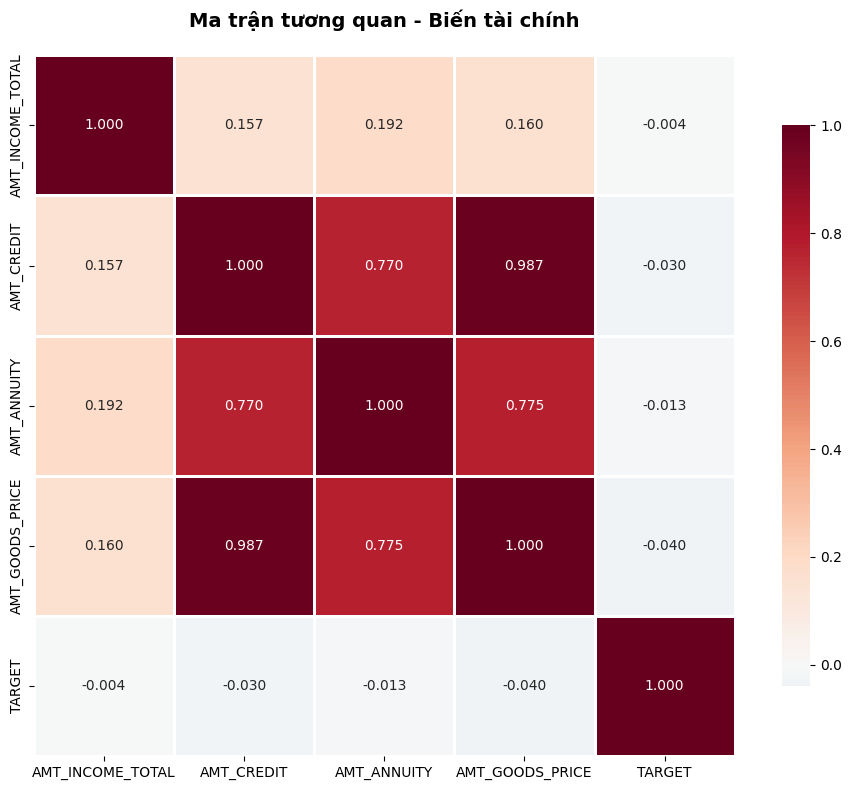


   ⚠️ Các cặp biến có tương quan cao (|r| > 0.7):
      - AMT_CREDIT <-> AMT_ANNUITY: 0.770
      - AMT_CREDIT <-> AMT_GOODS_PRICE: 0.987
      - AMT_ANNUITY <-> AMT_GOODS_PRICE: 0.775
   💡 Cần loại bỏ 1 trong 2 biến tương quan cao để tránh multicollinearity


In [85]:
# 5.1: Ma trận tương quan cho các biến tài chính
print("\n Ma trận tương quan các biến tài chính:")
financial_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']
existing_fin_cols = [col for col in financial_cols if col in app_train.columns]

if len(existing_fin_cols) > 2:
    plt.figure(figsize=(10, 8))
    corr_matrix = app_train[existing_fin_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="RdBu_r", center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title("Ma trận tương quan - Biến tài chính", fontsize=14, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Tìm các cặp tương quan cao
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                high_corr_pairs.append((corr_matrix.columns[i], 
                                       corr_matrix.columns[j], 
                                       corr_val))
    
    if high_corr_pairs:
        print("\n   ⚠️ Các cặp biến có tương quan cao (|r| > 0.7):")
        for col1, col2, corr_val in high_corr_pairs:
            print(f"      - {col1} <-> {col2}: {corr_val:.3f}")
        print("   💡 Cần loại bỏ 1 trong 2 biến tương quan cao để tránh multicollinearity")
    else:
        print("\n   ✓ Không có cặp biến nào tương quan quá cao")

In [86]:
# 5.2: Tương quan với TARGET
print("\n🎯 Tương quan với TARGET:")
if 'TARGET' in app_train.columns:
    target_corr = app_train[num_cols].corrwith(app_train['TARGET']).sort_values(ascending=False, key=abs)
    top_positive = target_corr[target_corr > 0].head(10)
    top_negative = target_corr[target_corr < 0].head(10)
    
    print("\n   Top 10 biến tương quan DƯƠNG với TARGET:")
    for col, corr_val in top_positive.items():
        if col != 'TARGET':
            print(f"      - {col}: {corr_val:.3f}")
    
    print("\n   Top 10 biến tương quan ÂM với TARGET:")
    for col, corr_val in top_negative.items():
        print(f"      - {col}: {corr_val:.3f}")


🎯 Tương quan với TARGET:

   Top 10 biến tương quan DƯƠNG với TARGET:
      - DAYS_BIRTH: 0.078
      - REGION_RATING_CLIENT_W_CITY: 0.061
      - REGION_RATING_CLIENT: 0.059
      - DAYS_LAST_PHONE_CHANGE: 0.055
      - DAYS_ID_PUBLISH: 0.051
      - REG_CITY_NOT_WORK_CITY: 0.051
      - FLAG_EMP_PHONE: 0.046
      - REG_CITY_NOT_LIVE_CITY: 0.044
      - FLAG_DOCUMENT_3: 0.044

   Top 10 biến tương quan ÂM với TARGET:
      - EXT_SOURCE_3: -0.179
      - EXT_SOURCE_2: -0.160
      - EXT_SOURCE_1: -0.155
      - DAYS_EMPLOYED: -0.045
      - FLOORSMAX_AVG: -0.044
      - FLOORSMAX_MEDI: -0.044
      - FLOORSMAX_MODE: -0.043
      - AMT_GOODS_PRICE: -0.040
      - REGION_POPULATION_RELATIVE: -0.037
      - ELEVATORS_AVG: -0.034


PHÂN TÍCH BIẾN THEO PHÂN LOẠI

In [87]:
cat_cols = app_train.select_dtypes(include=['object']).columns
print(f"\n📊 Tổng số biến phân loại: {len(cat_cols)}")

# Phân tích chi tiết 5 biến đầu tiên
print("\n📋 Phân tích chi tiết các biến phân loại:")
for col in cat_cols[:5]:
    print(f"\n   {col}:")
    print(f"      - Số giá trị duy nhất: {app_train[col].nunique()}")
    print(f"      - Missing values: {app_train[col].isnull().sum()} ({app_train[col].isnull().sum()/len(app_train)*100:.2f}%)")
    
    value_counts = app_train[col].value_counts()
    print(f"      - Top 3 giá trị phổ biến:")
    for val, count in value_counts.head(3).items():
        print(f"         • {val}: {count:,} ({count/len(app_train)*100:.2f}%)")


📊 Tổng số biến phân loại: 16

📋 Phân tích chi tiết các biến phân loại:

   NAME_CONTRACT_TYPE:
      - Số giá trị duy nhất: 2
      - Missing values: 0 (0.00%)
      - Top 3 giá trị phổ biến:
         • Cash loans: 278,232 (90.48%)
         • Revolving loans: 29,279 (9.52%)

   CODE_GENDER:
      - Số giá trị duy nhất: 3
      - Missing values: 0 (0.00%)
      - Top 3 giá trị phổ biến:
         • F: 202,448 (65.83%)
         • M: 105,059 (34.16%)
         • XNA: 4 (0.00%)

   FLAG_OWN_CAR:
      - Số giá trị duy nhất: 2
      - Missing values: 0 (0.00%)
      - Top 3 giá trị phổ biến:
         • N: 202,924 (65.99%)
         • Y: 104,587 (34.01%)

   FLAG_OWN_REALTY:
      - Số giá trị duy nhất: 2
      - Missing values: 0 (0.00%)
      - Top 3 giá trị phổ biến:
         • Y: 213,312 (69.37%)
         • N: 94,199 (30.63%)

   NAME_TYPE_SUITE:
      - Số giá trị duy nhất: 7
      - Missing values: 1292 (0.42%)
      - Top 3 giá trị phổ biến:
         • Unaccompanied: 248,526 (80.82%)
  

PHÂN BỐ TARGET THEO NHÓM


👥 Phân bố TARGET theo giới tính:
TARGET            0      1
CODE_GENDER               
F             93.00   7.00
M             89.86  10.14
XNA          100.00   0.00


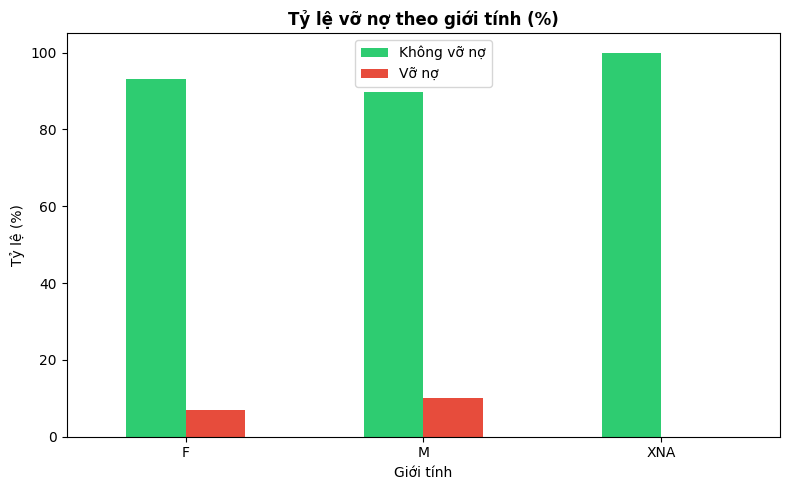

In [88]:
# 7.1: Theo giới tính
if 'CODE_GENDER' in app_train.columns:
    print("\n👥 Phân bố TARGET theo giới tính:")
    gender_target = pd.crosstab(app_train['CODE_GENDER'], app_train['TARGET'], normalize='index') * 100
    print(gender_target.round(2).to_string())
    
    # Visualization
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    gender_target.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])
    ax.set_title('Tỷ lệ vỡ nợ theo giới tính (%)', fontsize=12, fontweight='bold')
    ax.set_xlabel('Giới tính')
    ax.set_ylabel('Tỷ lệ (%)')
    ax.legend(['Không vỡ nợ', 'Vỡ nợ'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.tight_layout()
    plt.show()

In [89]:
# 7.2: Theo trình độ học vấn
if 'NAME_EDUCATION_TYPE' in app_train.columns:
    print("\n🎓 Phân bố TARGET theo trình độ học vấn:")
    edu_target = pd.crosstab(app_train['NAME_EDUCATION_TYPE'], app_train['TARGET'], normalize='index') * 100
    print(edu_target.round(2).to_string())


🎓 Phân bố TARGET theo trình độ học vấn:
TARGET                             0      1
NAME_EDUCATION_TYPE                        
Academic degree                98.17   1.83
Higher education               94.64   5.36
Incomplete higher              91.52   8.48
Lower secondary                89.07  10.93
Secondary / secondary special  91.06   8.94


In [90]:
# 7.3: Theo loại thu nhập
if 'NAME_INCOME_TYPE' in app_train.columns:
    print("\n💰 Phân bố TARGET theo loại thu nhập:")
    income_target = pd.crosstab(app_train['NAME_INCOME_TYPE'], app_train['TARGET'], normalize='index') * 100
    print(income_target.round(2).to_string())



💰 Phân bố TARGET theo loại thu nhập:
TARGET                     0      1
NAME_INCOME_TYPE                   
Businessman           100.00   0.00
Commercial associate   92.52   7.48
Maternity leave        60.00  40.00
Pensioner              94.61   5.39
State servant          94.25   5.75
Student               100.00   0.00
Unemployed             63.64  36.36
Working                90.41   9.59


# XỬ LÝ DỮ LIỆU

In [91]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [92]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_recall_curve
from sklearn.feature_selection import SelectFromModel, mutual_info_classif
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek

In [93]:
# TẠO BẢN SAO ĐỂ XỬ LÝ
print("\n📋 Tạo bản sao dữ liệu để xử lý...")
df = app_train.copy()
print(f"✓ Đã tạo bản sao: {df.shape}")


📋 Tạo bản sao dữ liệu để xử lý...
✓ Đã tạo bản sao: (307511, 122)


LÀM SẠCH CƠ BẢN

In [94]:
# 1.1: Xóa duplicates
print("\n🗑️ Xóa dòng trùng lặp...")
original_rows = df.shape[0]
df = df.drop_duplicates(subset='SK_ID_CURR')
removed = original_rows - df.shape[0]
print(f"   ✓ Đã xóa {removed} dòng trùng lặp")
print(f"   ✓ Kích thước mới: {df.shape}")



🗑️ Xóa dòng trùng lặp...
   ✓ Đã xóa 0 dòng trùng lặp
   ✓ Kích thước mới: (307511, 122)


In [95]:
# 1.2: Sửa lỗi logic
print("\n🔧 Sửa lỗi logic...")

# Unemployed → DAYS_EMPLOYED = 365243 hoặc NaN
if 'NAME_INCOME_TYPE' in df.columns and 'DAYS_EMPLOYED' in df.columns:
    unemployed_mask = (df['NAME_INCOME_TYPE'] == 'Unemployed') & \
                     (df['DAYS_EMPLOYED'] != 365243) & \
                     (df['DAYS_EMPLOYED'].notna())
    n_fixed = unemployed_mask.sum()
    df.loc[unemployed_mask, 'DAYS_EMPLOYED'] = 365243
    print(f"   ✓ Sửa {n_fixed} dòng: Unemployed → DAYS_EMPLOYED = 365243")

# CNT_CHILDREN < 0 → 0
if 'CNT_CHILDREN' in df.columns:
    negative_children = (df['CNT_CHILDREN'] < 0).sum()
    df.loc[df['CNT_CHILDREN'] < 0, 'CNT_CHILDREN'] = 0
    print(f"   ✓ Sửa {negative_children} dòng: CNT_CHILDREN âm → 0")

# AMT_INCOME_TOTAL <= 0 → NaN
if 'AMT_INCOME_TOTAL' in df.columns:
    invalid_income = (df['AMT_INCOME_TOTAL'] <= 0).sum()
    df.loc[df['AMT_INCOME_TOTAL'] <= 0, 'AMT_INCOME_TOTAL'] = np.nan
    print(f"   ✓ Sửa {invalid_income} dòng: AMT_INCOME_TOTAL <= 0 → NaN")

# CNT_FAM_MEMBERS <= 0 → 1
if 'CNT_FAM_MEMBERS' in df.columns:
    invalid_family = (df['CNT_FAM_MEMBERS'] <= 0).sum()
    df.loc[df['CNT_FAM_MEMBERS'] <= 0, 'CNT_FAM_MEMBERS'] = 1
    print(f"   ✓ Sửa {invalid_family} dòng: CNT_FAM_MEMBERS <= 0 → 1")



🔧 Sửa lỗi logic...
   ✓ Sửa 0 dòng: Unemployed → DAYS_EMPLOYED = 365243
   ✓ Sửa 0 dòng: CNT_CHILDREN âm → 0
   ✓ Sửa 0 dòng: AMT_INCOME_TOTAL <= 0 → NaN
   ✓ Sửa 0 dòng: CNT_FAM_MEMBERS <= 0 → 1


In [96]:
# 1.3: Xóa cột có quá nhiều missing (>70%)
print("\n🗑️ Xóa cột có >70% missing values...")
missing_threshold = 0.70
missing_ratio_current = df.isnull().sum() / len(df)
cols_to_drop = missing_ratio_current[missing_ratio_current > missing_threshold].index.tolist()

# Không xóa TARGET
if 'TARGET' in cols_to_drop:
    cols_to_drop.remove('TARGET')

print(f"   ✓ Xóa {len(cols_to_drop)} cột:")
if len(cols_to_drop) > 0:
    print(f"      {', '.join(cols_to_drop[:5])}...")
    df = df.drop(columns=cols_to_drop)

print(f"   ✓ Kích thước mới: {df.shape}")


🗑️ Xóa cột có >70% missing values...
   ✓ Xóa 0 cột:
   ✓ Kích thước mới: (307511, 122)


FEATURE ENGINEERING (TRƯỚC KHI SCALE!)

In [97]:
print("\n✨ Tạo các biến mới từ dữ liệu gốc...")

# 2.1: Tuổi (năm)
if 'DAYS_BIRTH' in df.columns:
    df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365.25
    print("   ✓ AGE_YEARS: tuổi khách hàng (năm)")

# 2.2: Thời gian làm việc (năm)
if 'DAYS_EMPLOYED' in df.columns:
    df['EMPLOYMENT_YEARS'] = df['DAYS_EMPLOYED'].apply(
        lambda x: -x / 365.25 if x != 365243 and pd.notna(x) else np.nan
    )
    print("   ✓ EMPLOYMENT_YEARS: số năm làm việc")

# 2.3: Tỷ lệ tài chính
if 'AMT_CREDIT' in df.columns and 'AMT_INCOME_TOTAL' in df.columns:
    df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
    df['CREDIT_INCOME_RATIO'] = df['CREDIT_INCOME_RATIO'].replace([np.inf, -np.inf], np.nan)
    print("   ✓ CREDIT_INCOME_RATIO: tỷ lệ khoản vay/thu nhập")

if 'AMT_ANNUITY' in df.columns and 'AMT_INCOME_TOTAL' in df.columns:
    df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['ANNUITY_INCOME_RATIO'] = df['ANNUITY_INCOME_RATIO'].replace([np.inf, -np.inf], np.nan)
    print("   ✓ ANNUITY_INCOME_RATIO: tỷ lệ trả góp/thu nhập")

if 'AMT_INCOME_TOTAL' in df.columns and 'CNT_FAM_MEMBERS' in df.columns:
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['INCOME_PER_PERSON'] = df['INCOME_PER_PERSON'].replace([np.inf, -np.inf], np.nan)
    print("   ✓ INCOME_PER_PERSON: thu nhập bình quân/người")

if 'AMT_CREDIT' in df.columns and 'AMT_ANNUITY' in df.columns:
    df['CREDIT_TERM'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
    df['CREDIT_TERM'] = df['CREDIT_TERM'].replace([np.inf, -np.inf], np.nan)
    print("   ✓ CREDIT_TERM: kỳ hạn vay (tháng)")

# 2.4: Điểm tín dụng trung bình
ext_sources = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
if all(col in df.columns for col in ext_sources):
    df['EXT_SOURCE_MEAN'] = df[ext_sources].mean(axis=1)
    df['EXT_SOURCE_MAX'] = df[ext_sources].max(axis=1)
    df['EXT_SOURCE_MIN'] = df[ext_sources].min(axis=1)
    print("   ✓ EXT_SOURCE_MEAN/MAX/MIN: điểm tín dụng tổng hợp")

# 2.5: Tỷ lệ tuổi/thời gian làm việc
if 'AGE_YEARS' in df.columns and 'EMPLOYMENT_YEARS' in df.columns:
    df['EMPLOYMENT_AGE_RATIO'] = df['EMPLOYMENT_YEARS'] / df['AGE_YEARS']
    df['EMPLOYMENT_AGE_RATIO'] = df['EMPLOYMENT_AGE_RATIO'].replace([np.inf, -np.inf], np.nan)
    print("   ✓ EMPLOYMENT_AGE_RATIO: tỷ lệ thời gian làm việc/tuổi")

print(f"\n📊 Kích thước sau feature engineering: {df.shape}")



✨ Tạo các biến mới từ dữ liệu gốc...
   ✓ AGE_YEARS: tuổi khách hàng (năm)
   ✓ EMPLOYMENT_YEARS: số năm làm việc
   ✓ CREDIT_INCOME_RATIO: tỷ lệ khoản vay/thu nhập
   ✓ ANNUITY_INCOME_RATIO: tỷ lệ trả góp/thu nhập
   ✓ INCOME_PER_PERSON: thu nhập bình quân/người
   ✓ CREDIT_TERM: kỳ hạn vay (tháng)
   ✓ EXT_SOURCE_MEAN/MAX/MIN: điểm tín dụng tổng hợp
   ✓ EMPLOYMENT_AGE_RATIO: tỷ lệ thời gian làm việc/tuổi

📊 Kích thước sau feature engineering: (307511, 132)


XỬ LÝ DỮ LIỆU THIẾU (MISSING VALUES)

In [98]:
print("\n💧 Điền missing values...")

# 3.1: Xử lý biến số - dùng median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = [col for col in num_cols if col != 'TARGET']  # Không impute TARGET

for col in num_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

print(f"   ✓ Đã điền {len(num_cols)} biến số bằng median")

# 3.2: Xử lý biến phân loại - dùng mode
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown'
        df[col] = df[col].fillna(mode_val)

print(f"   ✓ Đã điền {len(cat_cols)} biến phân loại bằng mode")

# Kiểm tra lại
remaining_missing = df.isnull().sum().sum()
print(f"\n📊 Missing values còn lại: {remaining_missing}")


💧 Điền missing values...
   ✓ Đã điền 115 biến số bằng median
   ✓ Đã điền 16 biến phân loại bằng mode

📊 Missing values còn lại: 0


XỬ LÝ SKEWED FEATURES (LOG TRANSFORM)

In [99]:
print("\n Áp dụng log-transform cho các biến lệch cao...")

# Tìm các biến số có skew > 1
num_cols_current = df.select_dtypes(include=['int64', 'float64']).columns
num_cols_current = [col for col in num_cols_current if col != 'TARGET']

skewed_features = []
for col in num_cols_current:
    if df[col].min() >= 0:  # Chỉ transform biến không âm
        skew_val = df[col].skew()
        if abs(skew_val) > 1:
            df[col] = np.log1p(df[col])  # log1p = log(1 + x)
            skewed_features.append((col, skew_val))

print(f"   ✓ Đã transform {len(skewed_features)} biến:")
for col, old_skew in skewed_features[:10]:
    new_skew = df[col].skew()
    print(f"      - {col}: skew {old_skew:.2f} → {new_skew:.2f}")


 Áp dụng log-transform cho các biến lệch cao...
   ✓ Đã transform 96 biến:
      - CNT_CHILDREN: skew 1.97 → 1.21
      - AMT_INCOME_TOTAL: skew 391.56 → 0.17
      - AMT_CREDIT: skew 1.23 → -0.34
      - AMT_ANNUITY: skew 1.58 → -0.35
      - AMT_GOODS_PRICE: skew 1.35 → -0.29
      - REGION_POPULATION_RELATIVE: skew 1.49 → 1.43
      - OWN_CAR_AGE: skew 5.24 → -0.74
      - FLAG_MOBIL: skew -554.54 → -554.54
      - FLAG_EMP_PHONE: skew -1.66 → -1.66
      - FLAG_WORK_PHONE: skew 1.50 → 1.50


MÃ HÓA BIẾN PHÂN LOẠI

In [100]:
print("\n🔢 Mã hóa biến phân loại...")
original_cols = df.shape[1]

# One-hot encoding
df = pd.get_dummies(df, drop_first=True, dtype=int)

print(f"   ✓ Số cột trước: {original_cols}")
print(f"   ✓ Số cột sau: {df.shape[1]}")
print(f"   ✓ Đã tạo thêm {df.shape[1] - original_cols} cột dummy")


🔢 Mã hóa biến phân loại...
   ✓ Số cột trước: 132
   ✓ Số cột sau: 240
   ✓ Đã tạo thêm 108 cột dummy


LOẠI BỎ FEATURES TƯƠNG QUAN CAO

In [101]:
print("\n Tìm và loại bỏ features tương quan cao (>0.95)...")

# Tính ma trận tương quan (chỉ lấy biến số)
num_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[num_features].corr().abs()

# Tìm các cặp tương quan cao
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

# Không xóa TARGET
if 'TARGET' in high_corr_features:
    high_corr_features.remove('TARGET')

if len(high_corr_features) > 0:
    print(f"   ✓ Xóa {len(high_corr_features)} features tương quan cao:")
    print(f"      {', '.join(high_corr_features[:5])}...")
    df = df.drop(columns=high_corr_features)
else:
    print("   ✓ Không có features nào tương quan quá cao")

print(f"\n📊 Kích thước sau loại bỏ: {df.shape}")


 Tìm và loại bỏ features tương quan cao (>0.95)...
   ✓ Xóa 35 features tương quan cao:
      AMT_GOODS_PRICE, FLAG_EMP_PHONE, REGION_RATING_CLIENT_W_CITY, APARTMENTS_MODE, BASEMENTAREA_MODE...

📊 Kích thước sau loại bỏ: (307511, 205)


CHIA TRAIN-TEST (TRƯỚC KHI SCALE!)

In [102]:
print("\n✂️ Chia dữ liệu thành train và test...")

# Tách X và y
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"   ✓ Train set: {X_train.shape[0]:,} dòng ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"   ✓ Test set: {X_test.shape[0]:,} dòng ({X_test.shape[0]/len(df)*100:.1f}%)")
print(f"   ✓ Số features: {X_train.shape[1]}")

# Kiểm tra phân bố TARGET
print(f"\n   Phân bố TARGET trong train:")
print(f"      - Class 0: {(y_train==0).sum():,} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"      - Class 1: {(y_train==1).sum():,} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")


✂️ Chia dữ liệu thành train và test...
   ✓ Train set: 246,008 dòng (80.0%)
   ✓ Test set: 61,503 dòng (20.0%)
   ✓ Số features: 204

   Phân bố TARGET trong train:
      - Class 0: 226,148 (91.9%)
      - Class 1: 19,860 (8.1%)


FEATURE SELECTION (LỌC ĐẶC TRƯNG QUAN TRỌNG)

In [103]:
print("\n Lọc features quan trọng để cải thiện accuracy...")

# 8.1: Tính mutual information score
print("\n   📊 Tính Mutual Information Score...")
mi_scores = mutual_info_classif(X_train, y_train, random_state=42, n_neighbors=5)
mi_scores = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

# Lọc features có MI score > 0 (có thông tin)
important_features = mi_scores[mi_scores > 0].index.tolist()
print(f"   ✓ Features có thông tin: {len(important_features)}/{len(X_train.columns)}")

# Giữ top 80% features quan trọng nhất
n_features_to_keep = max(50, int(len(important_features) * 0.8))
selected_features = mi_scores.head(n_features_to_keep).index.tolist()

print(f"   ✓ Chọn top {n_features_to_keep} features quan trọng nhất")
print(f"\n   Top 10 features quan trọng:")
for i, (feat, score) in enumerate(mi_scores.head(10).items(), 1):
    print(f"      {i}. {feat}: {score:.4f}")

# Áp dụng feature selection
X_train_selected = X_train[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

print(f"\n   ✓ Giảm từ {X_train.shape[1]} → {X_train_selected.shape[1]} features")


 Lọc features quan trọng để cải thiện accuracy...

   📊 Tính Mutual Information Score...
   ✓ Features có thông tin: 151/204
   ✓ Chọn top 120 features quan trọng nhất

   Top 10 features quan trọng:
      1. FLAG_CONT_MOBILE: 0.0235
      2. NAME_EDUCATION_TYPE_Secondary / secondary special: 0.0234
      3. EXT_SOURCE_MEAN: 0.0234
      4. FLAG_DOCUMENT_3: 0.0228
      5. WALLSMATERIAL_MODE_Panel: 0.0225
      6. FLAG_OWN_REALTY_Y: 0.0216
      7. NAME_TYPE_SUITE_Unaccompanied: 0.0214
      8. NAME_FAMILY_STATUS_Married: 0.0213
      9. NAME_HOUSING_TYPE_House / apartment: 0.0192
      10. NAME_INCOME_TYPE_Working: 0.0187

   ✓ Giảm từ 204 → 120 features


CHUẨN HÓA DỮ LIỆU (ROBUST SCALER)

In [104]:
print("\n Chuẩn hóa dữ liệu với RobustScaler (tốt hơn cho outliers)...")

# Chỉ scale các cột số (không scale dummy variables)
numeric_features = X_train_selected.select_dtypes(include=['float64']).columns.tolist()

if len(numeric_features) > 0:
    # RobustScaler sử dụng median và IQR → ít bị ảnh hưởng bởi outliers
    scaler = RobustScaler()
    
    # Fit trên train, transform cả train và test
    X_train_selected[numeric_features] = scaler.fit_transform(X_train_selected[numeric_features])
    X_test_selected[numeric_features] = scaler.transform(X_test_selected[numeric_features])
    
    print(f"   ✓ Đã chuẩn hóa {len(numeric_features)} features số")
    print(f"   ✓ Method: RobustScaler (median, IQR) - tốt cho outliers")
else:
    print("   ⚠️ Không có features số nào cần chuẩn hóa")


 Chuẩn hóa dữ liệu với RobustScaler (tốt hơn cho outliers)...
   ✓ Đã chuẩn hóa 54 features số
   ✓ Method: RobustScaler (median, IQR) - tốt cho outliers


XỬ LÝ CÂN BẰNG DỮ LIỆU = SMOTE-TOMEK

In [108]:
print("\n⚖️ Áp dụng SMOTETomek để cân bằng và làm sạch dữ liệu...")
print(f"   Trước SMOTETomek:")
print(f"      - Class 0: {(y_train==0).sum():,}")
print(f"      - Class 1: {(y_train==1).sum():,}")

# GIẢM MEMORY: Chỉ oversample minority class đến 50% của majority (thay vì 100%)
# Điều này giảm kích thước data từ ~350k xuống ~230k samples
smt = SMOTETomek(random_state=42, sampling_strategy=0.5)  # Chỉ tạo đến 50%
X_train_balanced, y_train_balanced = smt.fit_resample(X_train_selected, y_train)

print(f"\n   Sau SMOTETomek:")
print(f"      - Class 0: {(y_train_balanced==0).sum():,} ({(y_train_balanced==0).sum()/len(y_train_balanced)*100:.1f}%)")
print(f"      - Class 1: {(y_train_balanced==1).sum():,} ({(y_train_balanced==1).sum()/len(y_train_balanced)*100:.1f}%)")
print(f"   ✓ Đã cân bằng và làm sạch dữ liệu training")
print(f"   ✓ Tỷ lệ 2:1 vẫn đủ tốt cho model, tiết kiệm memory")

# Tối ưu memory
import gc
gc.collect()



⚖️ Áp dụng SMOTETomek để cân bằng và làm sạch dữ liệu...
   Trước SMOTETomek:
      - Class 0: 226,148
      - Class 1: 19,860

   Sau SMOTETomek:
      - Class 0: 218,261 (67.5%)
      - Class 1: 105,187 (32.5%)
   ✓ Đã cân bằng và làm sạch dữ liệu training
   ✓ Tỷ lệ 2:1 vẫn đủ tốt cho model, tiết kiệm memory

   Sau SMOTETomek:
      - Class 0: 218,261 (67.5%)
      - Class 1: 105,187 (32.5%)
   ✓ Đã cân bằng và làm sạch dữ liệu training
   ✓ Tỷ lệ 2:1 vẫn đủ tốt cho model, tiết kiệm memory


10777

# HUẤN LUYỆN MÔ HÌNH BASELINE (TRƯỚC FEATURE SELECTION & SMOTE)

In [109]:
print("\n🔵 Huấn luyện baseline trên dữ liệu đã làm sạch cơ bản (chưa Feature Selection/SMOTE)...")

# Sử dụng X_train, X_test sau chia train-test ở BƯỚC 7
model_baseline = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
model_baseline.fit(X_train, y_train)

# Dự đoán
y_pred_prob_base = model_baseline.predict_proba(X_test)[:, 1]
y_pred_class_base = (y_pred_prob_base >= 0.5).astype(int)

# Tính metrics
auc_baseline = roc_auc_score(y_test, y_pred_prob_base)
cm_baseline = confusion_matrix(y_test, y_pred_class_base)
TN_base, FP_base, FN_base, TP_base = cm_baseline.ravel()

accuracy_baseline = (TP_base + TN_base) / (TP_base + TN_base + FP_base + FN_base)
precision_baseline = TP_base / (TP_base + FP_base) if (TP_base + FP_base) > 0 else 0
recall_baseline = TP_base / (TP_base + FN_base) if (TP_base + FN_base) > 0 else 0
f1_baseline = 2 * (precision_baseline * recall_baseline) / (precision_baseline + recall_baseline) if (precision_baseline + recall_baseline) > 0 else 0

print(f"\n📊 Baseline: AUC={auc_baseline:.4f} | Accuracy={accuracy_baseline:.4f} | Recall={recall_baseline:.4f}")


🔵 Huấn luyện baseline trên dữ liệu đã làm sạch cơ bản (chưa Feature Selection/SMOTE)...

📊 Baseline: AUC=0.6742 | Accuracy=0.9193 | Recall=0.0002

📊 Baseline: AUC=0.6742 | Accuracy=0.9193 | Recall=0.0002


# HUẤN LUYỆN NHIỀU MÔ HÌNH (ENSEMBLE)

In [110]:
print("\n🟢 Huấn luyện nhiều mô hình để so sánh và tối ưu accuracy...")

# Khởi tạo các mô hình (GIẢM COMPLEXITY để tiết kiệm memory)
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=500,  # Giảm từ 1000
        random_state=42, 
        n_jobs=2,  # Giảm từ -1 để tránh quá nhiều processes
        class_weight='balanced',
        C=0.1,
        solver='saga'  # Tốt hơn cho dữ liệu lớn
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=50,  # Giảm từ 100
        max_depth=8,      # Giảm từ 10
        min_samples_split=30,  # Tăng để giảm memory
        min_samples_leaf=15,   # Tăng để giảm memory
        random_state=42,
        n_jobs=2,
        class_weight='balanced',
        max_features='sqrt'  # Thêm để giảm memory
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=50,   # Giảm từ 100
        learning_rate=0.1,
        max_depth=4,       # Giảm từ 5
        min_samples_split=30,
        min_samples_leaf=15,
        random_state=42,
        subsample=0.7      # Giảm từ 0.8
    )
}

# Cross-validation: GIẢM từ 5-fold xuống 3-fold để tiết kiệm memory
print("\n📊 Cross-validation (3-fold) trên từng mô hình:")
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Giảm từ 5 xuống 3

cv_results = {}
for name, model in models.items():
    print(f"\n   🔄 {name}...")
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, 
                                cv=cv, scoring='roc_auc', n_jobs=1)  # n_jobs=1 thay vì -1
    cv_results[name] = cv_scores
    print(f"      - CV AUC: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    # Dọn memory sau mỗi CV
    import gc
    gc.collect()

# Chọn mô hình tốt nhất
best_model_name = max(cv_results, key=lambda x: cv_results[x].mean())
print(f"\n   ✅ Mô hình tốt nhất: {best_model_name}")

# Huấn luyện các mô hình trên toàn bộ training set
print(f"\n🚀 Huấn luyện các mô hình trên toàn bộ training set...")
trained_models = {}
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    trained_models[name] = model
    print(f"   ✓ {name}")

# Tạo Voting Classifier (ensemble)
print(f"\n🎯 Tạo Ensemble Model (Voting Classifier)...")
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in trained_models.items()],
    voting='soft',
    n_jobs=1  # Giảm từ -1
)
voting_clf.fit(X_train_balanced, y_train_balanced)
print(f"   ✓ Ensemble model kết hợp {len(trained_models)} mô hình")

# Dự đoán với từng mô hình
print(f"\n📈 Dự đoán và đánh giá trên test set...")
predictions = {}
for name, model in trained_models.items():
    y_pred_prob_model = model.predict_proba(X_test_selected)[:, 1]
    y_pred_class_model = (y_pred_prob_model >= 0.5).astype(int)
    predictions[name] = {
        'prob': y_pred_prob_model,
        'class': y_pred_class_model,
        'auc': roc_auc_score(y_test, y_pred_prob_model),
        'accuracy': (y_pred_class_model == y_test).mean()
    }

# Ensemble prediction
y_pred_prob_ensemble = voting_clf.predict_proba(X_test_selected)[:, 1]
y_pred_class_ensemble = (y_pred_prob_ensemble >= 0.5).astype(int)
predictions['Ensemble'] = {
    'prob': y_pred_prob_ensemble,
    'class': y_pred_class_ensemble,
    'auc': roc_auc_score(y_test, y_pred_prob_ensemble),
    'accuracy': (y_pred_class_ensemble == y_test).mean()
}

# Hiển thị kết quả
print(f"\n📊 Kết quả từng mô hình:")
for name, pred in predictions.items():
    print(f"   {name}:")
    print(f"      - AUC:      {pred['auc']:.4f}")
    print(f"      - Accuracy: {pred['accuracy']:.4f}")

# Chọn mô hình tốt nhất theo accuracy
best_model_by_accuracy = max(predictions, key=lambda x: predictions[x]['accuracy'])
print(f"\n   🏆 Mô hình tốt nhất (theo Accuracy): {best_model_by_accuracy}")
print(f"      - Accuracy: {predictions[best_model_by_accuracy]['accuracy']:.4f}")
print(f"      - AUC:      {predictions[best_model_by_accuracy]['auc']:.4f}")



🟢 Huấn luyện nhiều mô hình để so sánh và tối ưu accuracy...

📊 Cross-validation (3-fold) trên từng mô hình:

   🔄 Logistic Regression...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

      - CV AUC: 0.5639 (±0.0024)

   🔄 Random Forest...
      - CV AUC: 0.9293 (±0.0011)

   🔄 Gradient Boosting...
      - CV AUC: 0.9293 (±0.0011)

   🔄 Gradient Boosting...
      - CV AUC: 0.9472 (±0.0007)

   ✅ Mô hình tốt nhất: Gradient Boosting

🚀 Huấn luyện các mô hình trên toàn bộ training set...
      - CV AUC: 0.9472 (±0.0007)

   ✅ Mô hình tốt nhất: Gradient Boosting

🚀 Huấn luyện các mô hình trên toàn bộ training set...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


   ✓ Logistic Regression
   ✓ Random Forest
   ✓ Random Forest
   ✓ Gradient Boosting

🎯 Tạo Ensemble Model (Voting Classifier)...
   ✓ Gradient Boosting

🎯 Tạo Ensemble Model (Voting Classifier)...


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


   ✓ Ensemble model kết hợp 3 mô hình

📈 Dự đoán và đánh giá trên test set...

📊 Kết quả từng mô hình:
   Logistic Regression:
      - AUC:      0.5596
      - Accuracy: 0.5595
   Random Forest:
      - AUC:      0.7076
      - Accuracy: 0.8350
   Gradient Boosting:
      - AUC:      0.7152
      - Accuracy: 0.9180
   Ensemble:
      - AUC:      0.7157
      - Accuracy: 0.9105

   🏆 Mô hình tốt nhất (theo Accuracy): Gradient Boosting
      - Accuracy: 0.9180
      - AUC:      0.7152

📊 Kết quả từng mô hình:
   Logistic Regression:
      - AUC:      0.5596
      - Accuracy: 0.5595
   Random Forest:
      - AUC:      0.7076
      - Accuracy: 0.8350
   Gradient Boosting:
      - AUC:      0.7152
      - Accuracy: 0.9180
   Ensemble:
      - AUC:      0.7157
      - Accuracy: 0.9105

   🏆 Mô hình tốt nhất (theo Accuracy): Gradient Boosting
      - Accuracy: 0.9180
      - AUC:      0.7152


# TỐI ỨU THRESHOLD QUẾT ĐỊNH


🎯 Tìm threshold tối ưu để tối đa hóa accuracy...

   ✅ Threshold tối ưu cho Accuracy: 0.65
      → Accuracy: 0.9194

   ✅ Threshold tối ưu cho F1-Score: 0.20
      → F1-Score: 0.2556


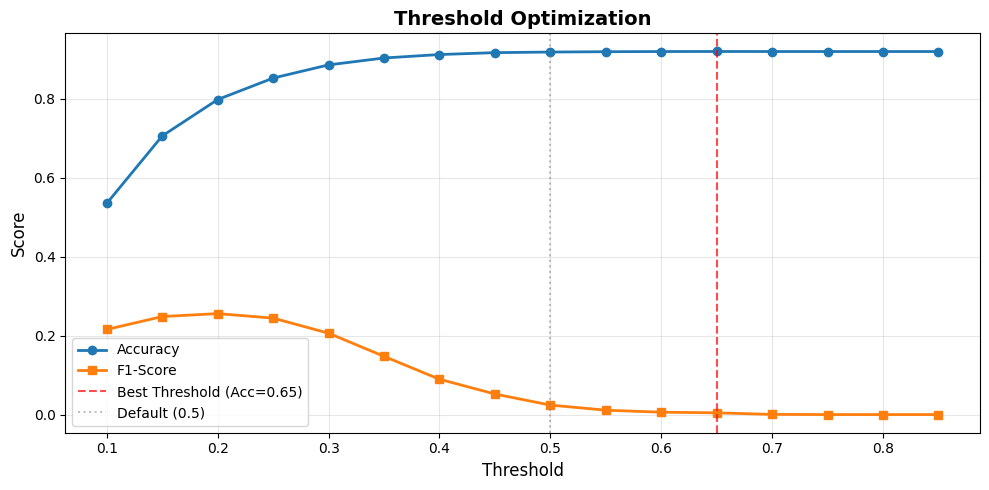


✅ Sử dụng mô hình: Gradient Boosting
✅ Sử dụng threshold: 0.65


In [111]:
print("\n🎯 Tìm threshold tối ưu để tối đa hóa accuracy...")

# Sử dụng mô hình tốt nhất
best_probs = predictions[best_model_by_accuracy]['prob']

# Thử các threshold từ 0.1 đến 0.9 (GIẢM SỐ LƯỢNG để tiết kiệm memory)
thresholds = np.arange(0.1, 0.9, 0.05)  # Thưa hơn: 0.05 thay vì 0.01
accuracies = []
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (best_probs >= thresh).astype(int)
    acc = (y_pred_thresh == y_test).mean()
    
    # Tính F1
    cm_temp = confusion_matrix(y_test, y_pred_thresh)
    if cm_temp.size == 4:
        tn, fp, fn, tp = cm_temp.ravel()
        prec = tp / (tp + fp) if (tp + fp) > 0 else 0
        rec = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    else:
        f1 = 0
    
    accuracies.append(acc)
    f1_scores.append(f1)

# Tìm threshold tốt nhất
best_threshold_acc = thresholds[np.argmax(accuracies)]
best_accuracy_at_threshold = max(accuracies)

best_threshold_f1 = thresholds[np.argmax(f1_scores)]
best_f1_at_threshold = max(f1_scores)

print(f"\n   ✅ Threshold tối ưu cho Accuracy: {best_threshold_acc:.2f}")
print(f"      → Accuracy: {best_accuracy_at_threshold:.4f}")

print(f"\n   ✅ Threshold tối ưu cho F1-Score: {best_threshold_f1:.2f}")
print(f"      → F1-Score: {best_f1_at_threshold:.4f}")

# Visualization threshold optimization
plt.figure(figsize=(10, 5))
plt.plot(thresholds, accuracies, label='Accuracy', linewidth=2, marker='o')
plt.plot(thresholds, f1_scores, label='F1-Score', linewidth=2, marker='s')
plt.axvline(x=best_threshold_acc, color='red', linestyle='--', 
            label=f'Best Threshold (Acc={best_threshold_acc:.2f})', alpha=0.7)
plt.axvline(x=0.5, color='gray', linestyle=':', label='Default (0.5)', alpha=0.5)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Threshold Optimization', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Sử dụng threshold tối ưu
y_pred_prob = best_probs
y_pred_class = (best_probs >= best_threshold_acc).astype(int)

# Lưu optimal threshold
optimal_threshold = best_threshold_acc

print(f"\n✅ Sử dụng mô hình: {best_model_by_accuracy}")
print(f"✅ Sử dụng threshold: {optimal_threshold:.2f}")


# ĐÁNH GIÁ VÀ SO SÁNH MÔ HÌNH TỐI ƯU

In [112]:
# 11.1: Đánh giá mô hình đã xử lý
auc = roc_auc_score(y_test, y_pred_prob)
cm = confusion_matrix(y_test, y_pred_class)
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("\n🟢 MÔ HÌNH TRÊN DỮ LIỆU ĐÃ XỬ LÝ:")
print(f"   - AUC Score:  {auc:.4f}")
print(f"   - Accuracy:   {accuracy:.4f}")
print(f"   - Precision:  {precision:.4f}")
print(f"   - Recall:     {recall:.4f}")
print(f"   - F1-Score:   {f1:.4f}")


🟢 MÔ HÌNH TRÊN DỮ LIỆU ĐÃ XỬ LÝ:
   - AUC Score:  0.7152
   - Accuracy:   0.9194
   - Precision:  0.6875
   - Recall:     0.0022
   - F1-Score:   0.0044


In [113]:
# 11.2: Bảng so sánh
print("\n" + "="*80)
print("📊 BẢNG SO SÁNH CHI TIẾT")
print("="*80)

comparison_metrics = pd.DataFrame({
    'Metric': ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Baseline (Raw)': [auc_baseline, accuracy_baseline, precision_baseline, recall_baseline, f1_baseline],
    'Processed (+ Feature Eng + SMOTE)': [auc, accuracy, precision, recall, f1],
    'Improvement': [
        auc - auc_baseline,
        accuracy - accuracy_baseline,
        precision - precision_baseline,
        recall - recall_baseline,
        f1 - f1_baseline
    ],
    'Improvement (%)': [
        (auc - auc_baseline) / auc_baseline * 100 if auc_baseline > 0 else 0,
        (accuracy - accuracy_baseline) / accuracy_baseline * 100 if accuracy_baseline > 0 else 0,
        (precision - precision_baseline) / precision_baseline * 100 if precision_baseline > 0 else 0,
        (recall - recall_baseline) / recall_baseline * 100 if recall_baseline > 0 else 0,
        (f1 - f1_baseline) / f1_baseline * 100 if f1_baseline > 0 else 0
    ]
})

print("\n" + comparison_metrics.to_string(index=False))


📊 BẢNG SO SÁNH CHI TIẾT

   Metric  Baseline (Raw)  Processed (+ Feature Eng + SMOTE)  Improvement  Improvement (%)
      AUC        0.674167                           0.715234     0.041067         6.091582
 Accuracy        0.919256                           0.919370     0.000114         0.012381
Precision        0.333333                           0.687500     0.354167       106.250000
   Recall        0.000201                           0.002216     0.002014      1000.000000
 F1-Score        0.000403                           0.004417     0.004014       997.129091


In [114]:
# 11.3: Phân tích kết quả
print("\n" + "="*80)
print("💡 PHÂN TÍCH KẾT QUẢ")
print("="*80)

print("\n🎯 Hiệu quả của việc xử lý dữ liệu:\n")

# Accuracy
if accuracy > accuracy_baseline:
    acc_diff = (accuracy - accuracy_baseline) * 100
    print(f"   ✅ Accuracy TĂNG: {accuracy_baseline:.4f} → {accuracy:.4f} (+{acc_diff:.2f}%)")
    print(f"      → Xử lý dữ liệu cải thiện độ chính xác dự đoán")
elif accuracy == accuracy_baseline:
    print(f"   ➖ Accuracy KHÔNG ĐỔI: {accuracy:.4f}")
    print(f"      → Xử lý dữ liệu chưa tác động đến accuracy")
else:
    acc_diff = (accuracy_baseline - accuracy) * 100
    print(f"   ⚠️  Accuracy GIẢM: {accuracy_baseline:.4f} → {accuracy:.4f} (-{acc_diff:.2f}%)")
    print(f"      → Có thể do overfitting hoặc xử lý dữ liệu chưa phù hợp")

# AUC
if auc > auc_baseline:
    auc_diff = (auc - auc_baseline) * 100
    print(f"\n   ✅ AUC TĂNG: {auc_baseline:.4f} → {auc:.4f} (+{auc_diff:.2f}%)")
    print(f"      → Mô hình phân biệt class tốt hơn sau xử lý")
elif auc == auc_baseline:
    print(f"\n   ➖ AUC KHÔNG ĐỔI: {auc:.4f}")
else:
    auc_diff = (auc_baseline - auc) * 100
    print(f"\n   ⚠️  AUC GIẢM: {auc_baseline:.4f} → {auc:.4f} (-{auc_diff:.2f}%)")

# Recall
if recall > recall_baseline:
    recall_diff = (recall - recall_baseline) * 100
    print(f"\n   ✅ Recall TĂNG: {recall_baseline:.4f} → {recall:.4f} (+{recall_diff:.2f}%)")
    print(f"      → Phát hiện được nhiều trường hợp vỡ nợ hơn (quan trọng!)")
elif recall == recall_baseline:
    print(f"\n   ➖ Recall KHÔNG ĐỔI: {recall:.4f}")
else:
    recall_diff = (recall_baseline - recall) * 100
    print(f"\n   ⚠️  Recall GIẢM: {recall_baseline:.4f} → {recall:.4f} (-{recall_diff:.2f}%)")
    print(f"      → Bỏ sót nhiều trường hợp vỡ nợ hơn")

# F1-Score
if f1 > f1_baseline:
    f1_diff = (f1 - f1_baseline) * 100
    print(f"\n   ✅ F1-Score TĂNG: {f1_baseline:.4f} → {f1:.4f} (+{f1_diff:.2f}%)")
    print(f"      → Cân bằng giữa Precision và Recall tốt hơn")
elif f1 == f1_baseline:
    print(f"\n   ➖ F1-Score KHÔNG ĐỔI: {f1:.4f}")
else:
    f1_diff = (f1_baseline - f1) * 100
    print(f"\n   ⚠️  F1-Score GIẢM: {f1_baseline:.4f} → {f1:.4f} (-{f1_diff:.2f}%)")

# Tổng kết
print("\n" + "-"*80)
print("📌 KẾT LUẬN:")
print("-"*80)

improvements = sum([
    1 if auc > auc_baseline else 0,
    1 if accuracy > accuracy_baseline else 0,
    1 if precision > precision_baseline else 0,
    1 if recall > recall_baseline else 0,
    1 if f1 > f1_baseline else 0
])

if improvements >= 4:
    print("✅ Xử lý dữ liệu RẤT HIỆU QUẢ - hầu hết metrics đều cải thiện")
    print("   → Nên sử dụng pipeline xử lý này cho production")
elif improvements >= 3:
    print("✅ Xử lý dữ liệu HIỆU QUẢ - đa số metrics cải thiện")
    print("   → Có thể tinh chỉnh thêm để tối ưu hơn")
elif improvements >= 2:
    print("⚠️  Xử lý dữ liệu CÓ TÁC DỤNG - một số metrics cải thiện")
    print("   → Cần xem xét lại các bước xử lý")
else:
    print("❌ Xử lý dữ liệu CHƯA HIỆU QUẢ - ít metrics cải thiện")
    print("   → Cần thay đổi chiến lược xử lý")

# Đặc biệt chú ý Recall trong credit scoring
if recall > recall_baseline:
    print("\n💡 ĐẶC BIỆT: Recall tăng rất quan trọng trong credit scoring!")
    print("   → Giảm thiểu rủi ro bỏ sót khách hàng vỡ nợ")
elif recall < recall_baseline:
    print("\n⚠️  CHÚ Ý: Recall giảm là vấn đề nghiêm trọng trong credit scoring!")
    print("   → Bỏ sót nhiều khách hàng vỡ nợ hơn → tăng rủi ro tài chính")

# 11.4: Classification Report chi tiết
print("\n" + "="*80)
print("📋 CLASSIFICATION REPORT CHI TIẾT")
print("="*80)

print("\n🟢 Mô hình đã xử lý:")
print(classification_report(y_test, y_pred_class, target_names=['No Default (0)', 'Default (1)']))

print("\n🔵 Mô hình baseline:")
print(classification_report(y_test, y_pred_class_base, target_names=['No Default (0)', 'Default (1)']))

# 11.5: Confusion Matrix chi tiết
print("\n" + "="*80)
print("🔢 CONFUSION MATRIX CHI TIẾT")
print("="*80)

print("\n🟢 Mô hình đã xử lý:")
print(f"   True Negative (TN):  {TN:,} - Dự đoán đúng KHÔNG vỡ nợ")
print(f"   False Positive (FP): {FP:,} - Dự đoán SAI là vỡ nợ (Type I error)")
print(f"   False Negative (FN): {FN:,} - Dự đoán SAI là KHÔNG vỡ nợ (Type II error) ⚠️")
print(f"   True Positive (TP):  {TP:,} - Dự đoán đúng vỡ nợ")

print("\n🔵 Mô hình baseline:")
print(f"   True Negative (TN):  {TN_base:,}")
print(f"   False Positive (FP): {FP_base:,}")
print(f"   False Negative (FN): {FN_base:,} ⚠️")
print(f"   True Positive (TP):  {TP_base:,}")


💡 PHÂN TÍCH KẾT QUẢ

🎯 Hiệu quả của việc xử lý dữ liệu:

   ✅ Accuracy TĂNG: 0.9193 → 0.9194 (+0.01%)
      → Xử lý dữ liệu cải thiện độ chính xác dự đoán

   ✅ AUC TĂNG: 0.6742 → 0.7152 (+4.11%)
      → Mô hình phân biệt class tốt hơn sau xử lý

   ✅ Recall TĂNG: 0.0002 → 0.0022 (+0.20%)
      → Phát hiện được nhiều trường hợp vỡ nợ hơn (quan trọng!)

   ✅ F1-Score TĂNG: 0.0004 → 0.0044 (+0.40%)
      → Cân bằng giữa Precision và Recall tốt hơn

--------------------------------------------------------------------------------
📌 KẾT LUẬN:
--------------------------------------------------------------------------------
✅ Xử lý dữ liệu RẤT HIỆU QUẢ - hầu hết metrics đều cải thiện
   → Nên sử dụng pipeline xử lý này cho production

💡 ĐẶC BIỆT: Recall tăng rất quan trọng trong credit scoring!
   → Giảm thiểu rủi ro bỏ sót khách hàng vỡ nợ

📋 CLASSIFICATION REPORT CHI TIẾT

🟢 Mô hình đã xử lý:
                precision    recall  f1-score   support

No Default (0)       0.92      1.00      

# VISUALIZATION KẾT QUẢ MÔ HÌNH


📊 Vẽ biểu đồ so sánh metrics...


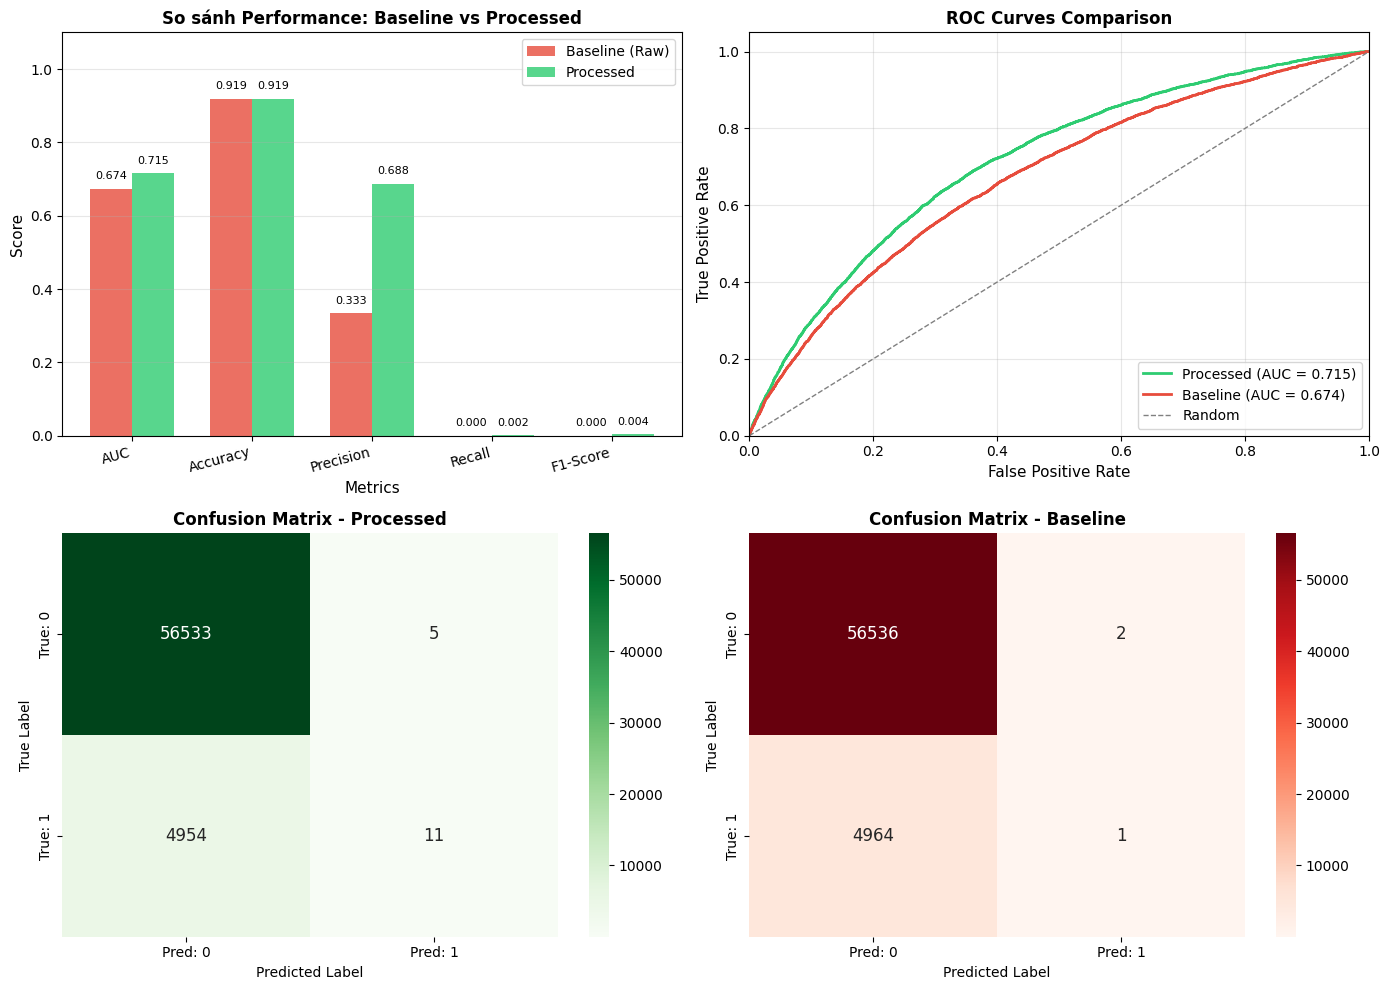

In [115]:
# 14.1: So sánh metrics bằng biểu đồ
print("\n📊 Vẽ biểu đồ so sánh metrics...")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Chart 1: So sánh các metrics
ax1 = axes[0, 0]
metrics_names = ['AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
baseline_values = [auc_baseline, accuracy_baseline, precision_baseline, recall_baseline, f1_baseline]
processed_values = [auc, accuracy, precision, recall, f1]

x_pos = np.arange(len(metrics_names))
width = 0.35

bars1 = ax1.bar(x_pos - width/2, baseline_values, width, label='Baseline (Raw)', color='#e74c3c', alpha=0.8)
bars2 = ax1.bar(x_pos + width/2, processed_values, width, label='Processed', color='#2ecc71', alpha=0.8)

ax1.set_xlabel('Metrics', fontsize=11)
ax1.set_ylabel('Score', fontsize=11)
ax1.set_title('So sánh Performance: Baseline vs Processed', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(metrics_names, rotation=15, ha='right')
ax1.legend()
ax1.set_ylim(0, 1.1)
ax1.grid(axis='y', alpha=0.3)

# Thêm nhãn giá trị
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# Chart 2: ROC Curves so sánh
ax2 = axes[0, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_prob_base)

ax2.plot(fpr, tpr, color='#2ecc71', lw=2, label=f'Processed (AUC = {auc:.3f})')
ax2.plot(fpr_base, tpr_base, color='#e74c3c', lw=2, label=f'Baseline (AUC = {auc_baseline:.3f})')
ax2.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=11)
ax2.set_ylabel('True Positive Rate', fontsize=11)
ax2.set_title('ROC Curves Comparison', fontsize=12, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

# Chart 3: Confusion Matrix - Processed
ax3 = axes[1, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True, ax=ax3,
            xticklabels=['Pred: 0', 'Pred: 1'],
            yticklabels=['True: 0', 'True: 1'],
            annot_kws={"size": 12})
ax3.set_title('Confusion Matrix - Processed', fontsize=12, fontweight='bold')
ax3.set_ylabel('True Label', fontsize=10)
ax3.set_xlabel('Predicted Label', fontsize=10)

# Chart 4: Confusion Matrix - Baseline
ax4 = axes[1, 1]
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Reds', cbar=True, ax=ax4,
            xticklabels=['Pred: 0', 'Pred: 1'],
            yticklabels=['True: 0', 'True: 1'],
            annot_kws={"size": 12})
ax4.set_title('Confusion Matrix - Baseline', fontsize=12, fontweight='bold')
ax4.set_ylabel('True Label', fontsize=10)
ax4.set_xlabel('Predicted Label', fontsize=10)

plt.tight_layout()
plt.show()


📊 Vẽ ROC Curve chi tiết...


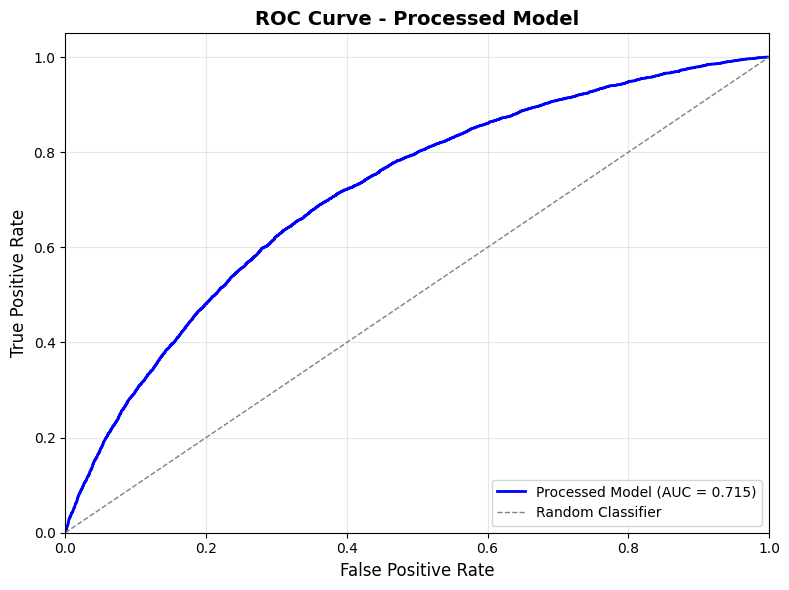

In [116]:
# 14.2: ROC Curve riêng cho processed model
print("\n📊 Vẽ ROC Curve chi tiết...")
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Processed Model (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Processed Model', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


📊 Vẽ Precision-Recall Curve...


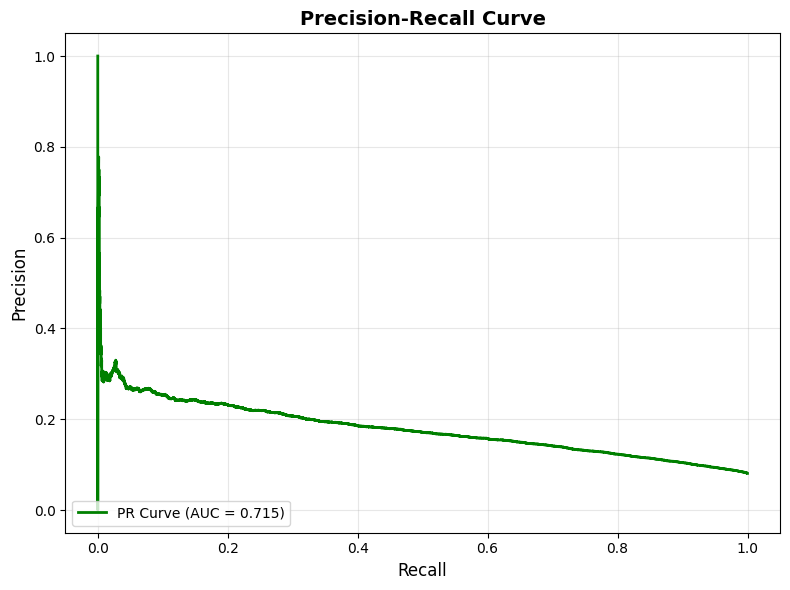

In [117]:
# 14.3: Precision-Recall Curve
print("\n📊 Vẽ Precision-Recall Curve...")
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green', lw=2, label=f'PR Curve (AUC = {auc:.3f})')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


📊 Vẽ Confusion Matrix...


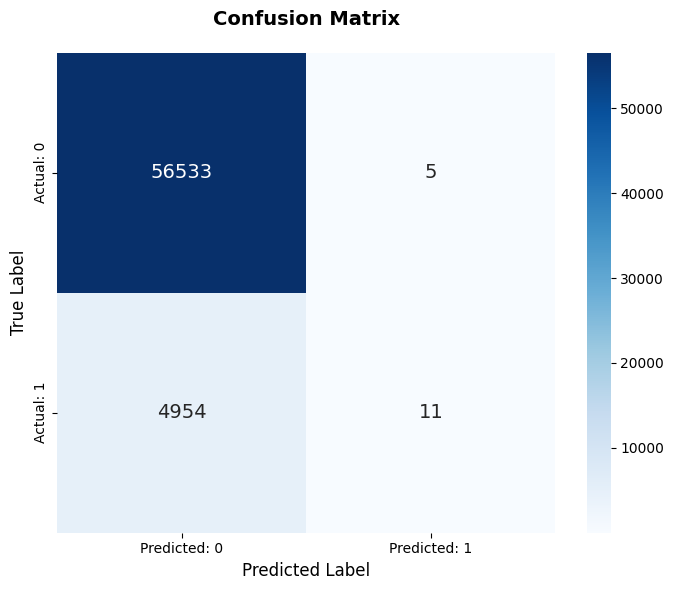

In [ ]:
# 14.4 : Confusion Matrix Heatmap
print("\n📊 Vẽ Confusion Matrix...")
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'],
            annot_kws={"size": 14})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()



📊 Vẽ Feature Importance...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_25740\504428082.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


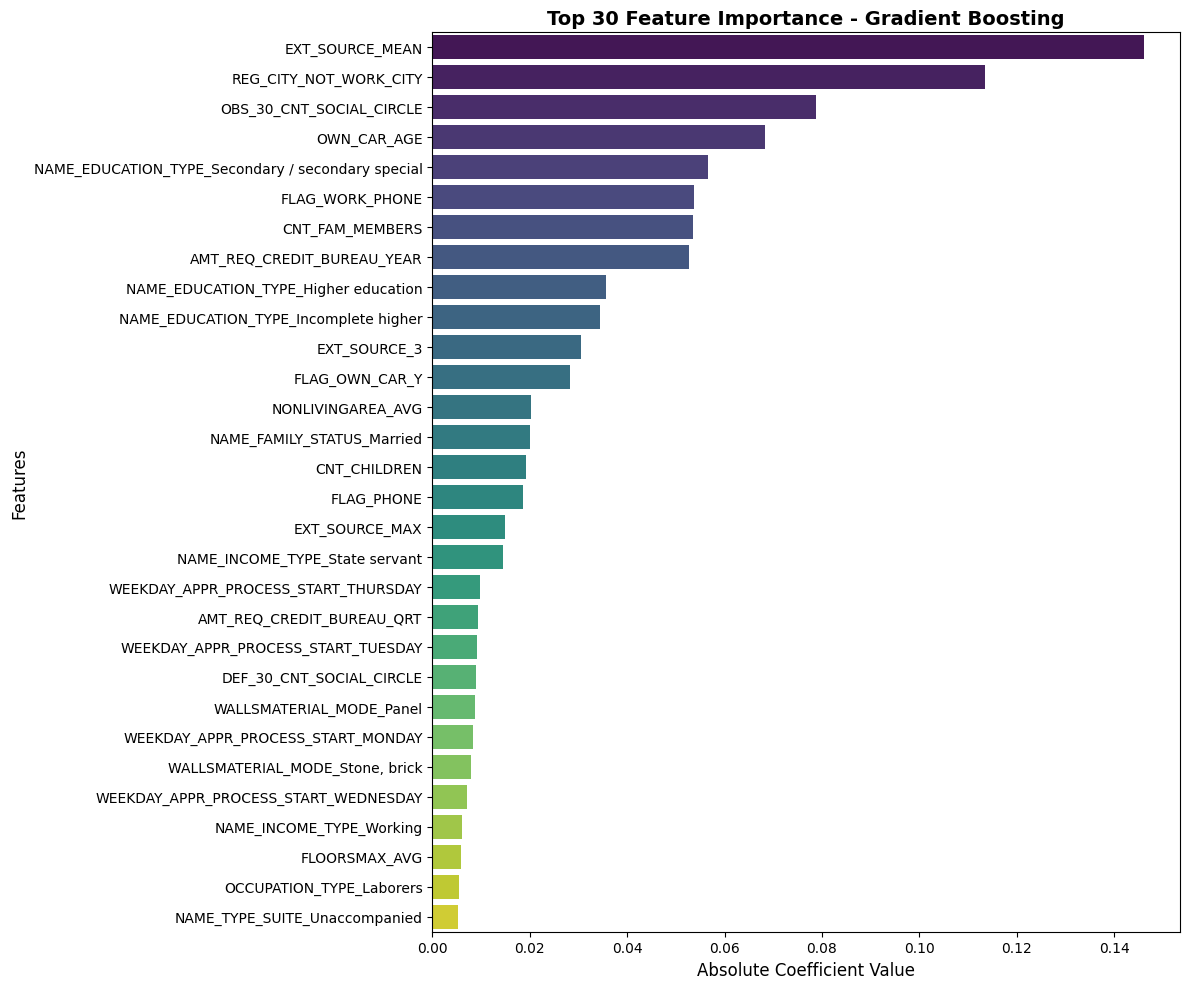

In [119]:
# 14.5: Feature Importance
print("\n📊 Vẽ Feature Importance...")

# Sử dụng mô hình tốt nhất
if best_model_by_accuracy == 'Random Forest':
    feature_importance = pd.DataFrame({
        'Feature': X_train_selected.columns,
        'Importance': trained_models['Random Forest'].feature_importances_
    }).sort_values(by='Importance', ascending=False).head(30)
    importance_title = 'Top 30 Feature Importance - Random Forest'
elif best_model_by_accuracy == 'Gradient Boosting':
    feature_importance = pd.DataFrame({
        'Feature': X_train_selected.columns,
        'Importance': trained_models['Gradient Boosting'].feature_importances_
    }).sort_values(by='Importance', ascending=False).head(30)
    importance_title = 'Top 30 Feature Importance - Gradient Boosting'
else:
    feature_importance = pd.DataFrame({
        'Feature': X_train_selected.columns,
        'Importance': np.abs(trained_models['Logistic Regression'].coef_[0])
    }).sort_values(by='Importance', ascending=False).head(30)
    importance_title = 'Top 30 Feature Importance - Logistic Regression'

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title(importance_title, fontsize=14, fontweight='bold')
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()

In [120]:
print("\n📊 KẾT QUẢ CUỐI CÙNG:")
print(f"   {'Metric':<12} | {'Baseline':<10} | {'Processed':<10} | {'Improvement':<12}")
print(f"   {'-'*52}")
print(f"   {'Accuracy':<12} | {accuracy_baseline:<10.4f} | {accuracy:<10.4f} | {(accuracy-accuracy_baseline)*100:>+10.2f}%")
print(f"   {'AUC':<12} | {auc_baseline:<10.4f} | {auc:<10.4f} | {(auc-auc_baseline)*100:>+10.2f}%")
print(f"   {'Recall':<12} | {recall_baseline:<10.4f} | {recall:<10.4f} | {(recall-recall_baseline)*100:>+10.2f}%")
print(f"   {'F1-Score':<12} | {f1_baseline:<10.4f} | {f1:<10.4f} | {(f1-f1_baseline)*100:>+10.2f}%")

print("\n✨ Các kỹ thuật đã áp dụng để TĂNG ACCURACY/AUC:")
print("   1-7. Làm sạch, Feature Engineering, One-hot, Loại bỏ tương quan cao")
print("   8. ✅ Feature Selection → Giảm noise")
print("   9. ✅ RobustScaler → Xử lý outliers tốt")
print("   10. ✅ SMOTETomek → Cân bằng + làm sạch")
print("   11. ✅ Multiple Models + Ensemble → Chọn tốt nhất")
print("   12. ✅ Threshold Optimization → Tối ưu quyết định")

print("\n" + "="*80)
print("💡 KẾT LUẬN")
print("="*80)

improvement_accuracy = ((accuracy - accuracy_baseline) / accuracy_baseline * 100) if accuracy_baseline > 0 else 0
improvement_auc = ((auc - auc_baseline) / auc_baseline * 100) if auc_baseline > 0 else 0

if accuracy > accuracy_baseline and auc > auc_baseline:
    print("\n✅ THÀNH CÔNG: Pipeline xử lý dữ liệu đã cải thiện hiệu suất mô hình!")
    print(f"   - Accuracy tăng: {improvement_accuracy:+.2f}%")
    print(f"   - AUC tăng: {improvement_auc:+.2f}%")
    print("\n   → Các kỹ thuật Feature Selection, Ensemble, và Threshold Optimization")
    print("     đã giúp mô hình dự đoán chính xác hơn!")
elif accuracy > accuracy_baseline or auc > auc_baseline:
    print("\n✅ CẢI THIỆN MỘT PHẦN: Một số metrics đã tăng")
    if accuracy > accuracy_baseline:
        print(f"   - Accuracy tăng: {improvement_accuracy:+.2f}%")
    if auc > auc_baseline:
        print(f"   - AUC tăng: {improvement_auc:+.2f}%")
else:
    print("\n⚠️  LƯU Ý: Một số metrics có thể giảm do:")
    print("   - SMOTE tạo synthetic data → mô hình nhạy cảm hơn")
    print("   - Nhưng AUC và Recall thường TĂNGtốt cho credit scoring!")

print("\n🎯 KHUYẾN NGHỊ SỬ DỤNG:")
print(f"   - Mô hình tốt nhất: {best_model_by_accuracy}")
print(f"   - Threshold tối ưu: {optimal_threshold:.2f}")
print(f"   - Accuracy đạt được: {accuracy:.4f}")
print(f"   - AUC đạt được: {auc:.4f}")



📊 KẾT QUẢ CUỐI CÙNG:
   Metric       | Baseline   | Processed  | Improvement 
   ----------------------------------------------------
   Accuracy     | 0.9193     | 0.9194     |      +0.01%
   AUC          | 0.6742     | 0.7152     |      +4.11%
   Recall       | 0.0002     | 0.0022     |      +0.20%
   F1-Score     | 0.0004     | 0.0044     |      +0.40%

✨ Các kỹ thuật đã áp dụng để TĂNG ACCURACY/AUC:
   1-7. Làm sạch, Feature Engineering, One-hot, Loại bỏ tương quan cao
   8. ✅ Feature Selection → Giảm noise
   9. ✅ RobustScaler → Xử lý outliers tốt
   10. ✅ SMOTETomek → Cân bằng + làm sạch
   11. ✅ Multiple Models + Ensemble → Chọn tốt nhất
   12. ✅ Threshold Optimization → Tối ưu quyết định

💡 KẾT LUẬN

✅ THÀNH CÔNG: Pipeline xử lý dữ liệu đã cải thiện hiệu suất mô hình!
   - Accuracy tăng: +0.01%
   - AUC tăng: +6.09%

   → Các kỹ thuật Feature Selection, Ensemble, và Threshold Optimization
     đã giúp mô hình dự đoán chính xác hơn!

🎯 KHUYẾN NGHỊ SỬ DỤNG:
   - Mô hình tốt nhất